In [13]:
%run './model/multi_corpus.py'
%run './constants.py'

from itertools import accumulate
import operator

In [2]:
corpora = co_citation_graphs()
Gs = {field_name: corpus['G'] for (field_name, corpus) in corpora.items()}
Dfs = {field_name: corpus['Df'] for (field_name, corpus) in corpora.items()}

Gender Studies Graph with 439 nodes and 810 edges
Geometry Graph with 298 nodes and 388 edges
Geophysics Graph with 16305 nodes and 82952 edges
Economics Graph with 4278 nodes and 53161 edges
Language & Linguistics Graph with 1270 nodes and 7819 edges
Probability & Statistics Graph with 1805 nodes and 8151 edges
Material Engineering Graph with 19577 nodes and 213117 edges
Artificial Intelligence Graph with 1897 nodes and 9012 edges
Sociology Graph with 2327 nodes and 21230 edges
International Business Graph with 2667 nodes and 39483 edges
Political Science Graph with 2442 nodes and 13314 edges
Genetics & Genomics Graph with 9323 nodes and 55121 edges
Immunology Graph with 12636 nodes and 190468 edges
Human Resources & Organizations Graph with 3063 nodes and 24554 edges
Ethnic & Cultural Studies Graph with 310 nodes and 506 edges
Neurology Graph with 18589 nodes and 270528 edges


In [3]:
communities = {}
community_lengths = {}
community_number = {}
for field_name, G in Gs.items():
    print(field_name)
    comms = nx.community.louvain_communities(G)
    communities[field_name] = comms
    community_lengths[field_name] = [len(comm) for comm in comms]
    community_number[field_name] = len(comms)

Gender Studies
Geometry
Geophysics
Economics
Language & Linguistics
Probability & Statistics
Material Engineering
Artificial Intelligence
Sociology
International Business
Political Science
Genetics & Genomics
Immunology
Human Resources & Organizations
Ethnic & Cultural Studies
Neurology


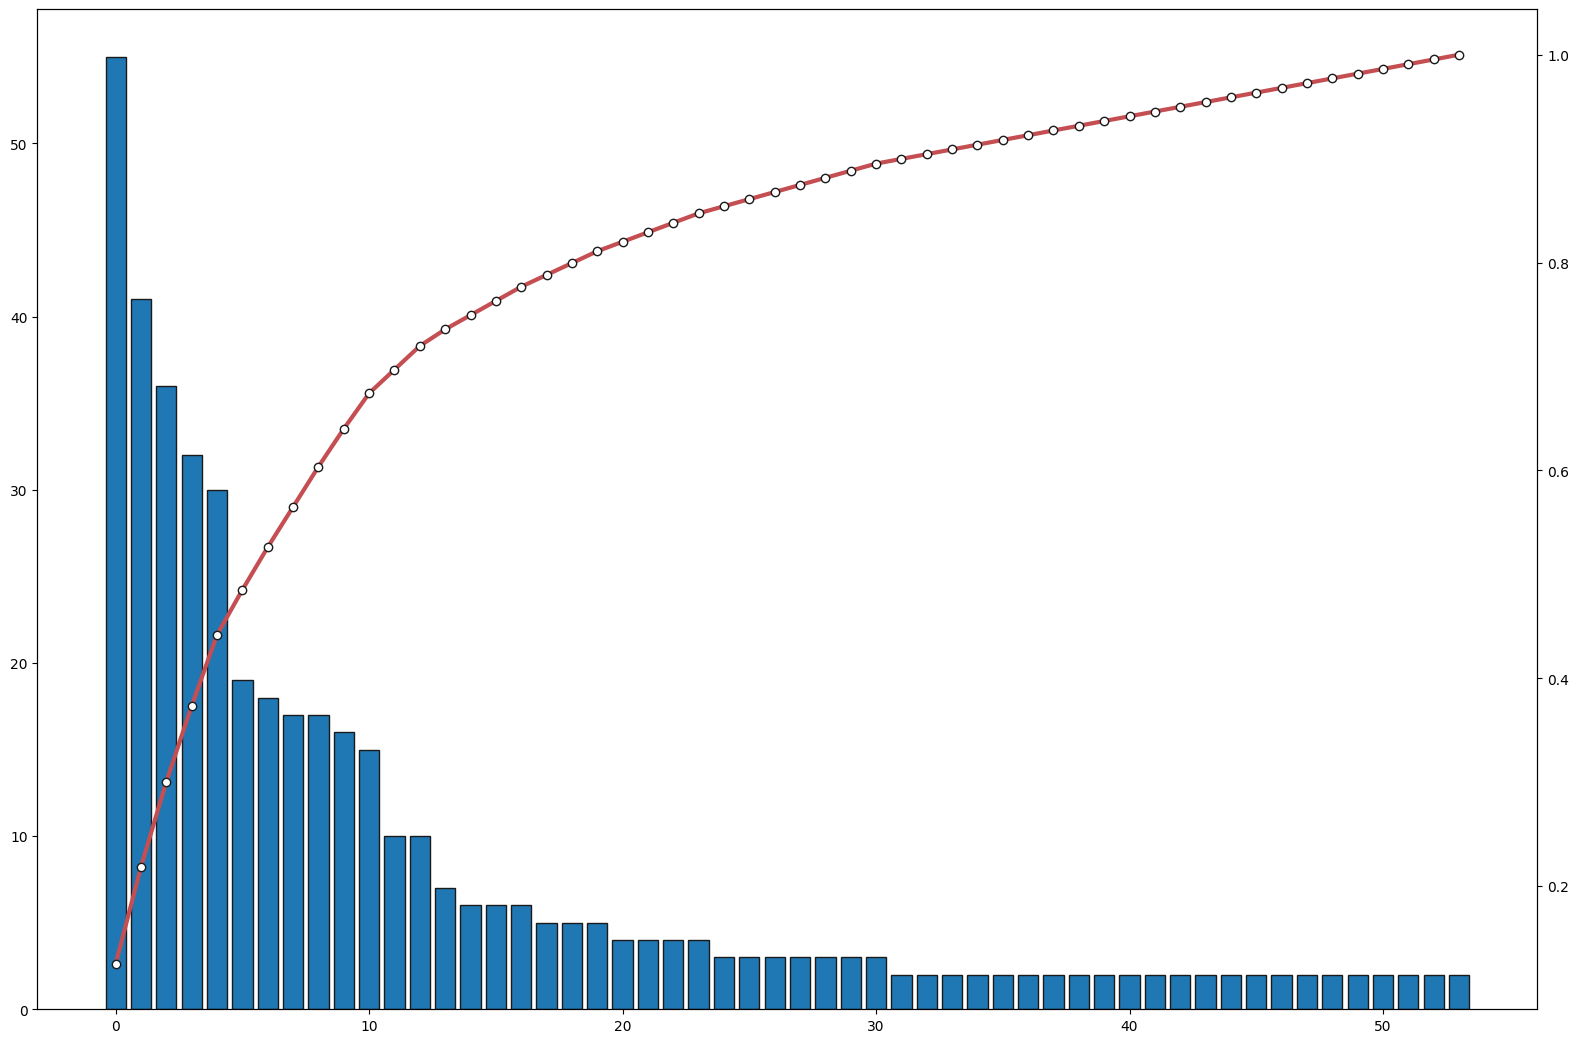

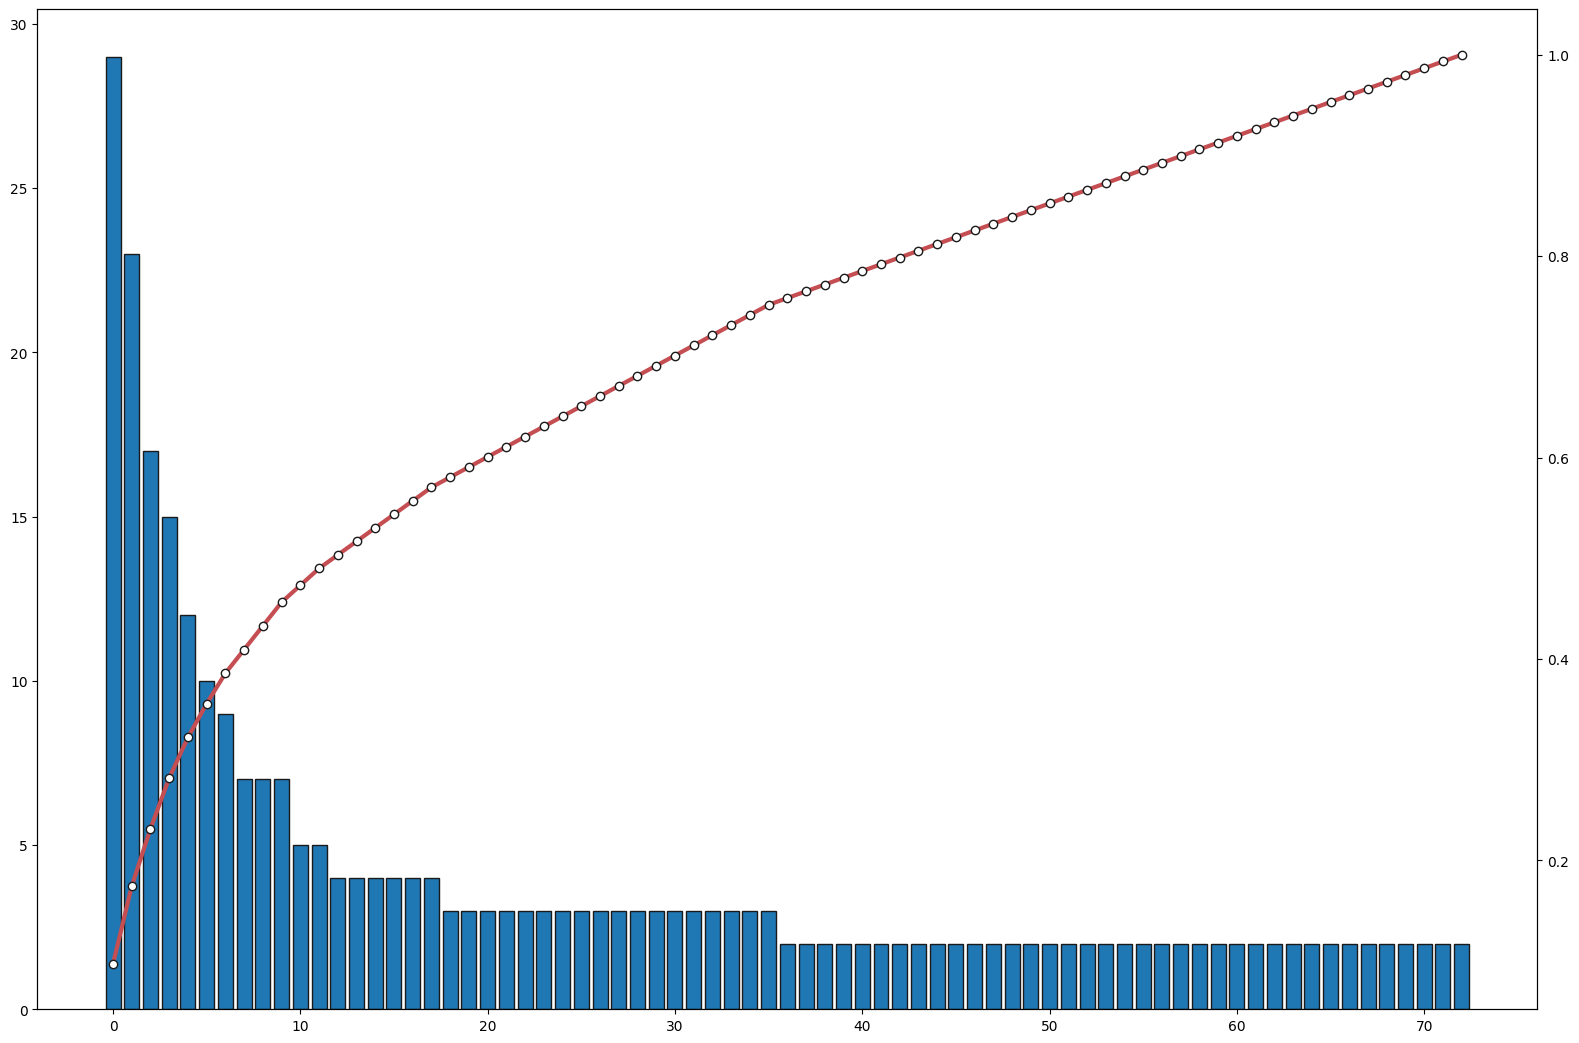

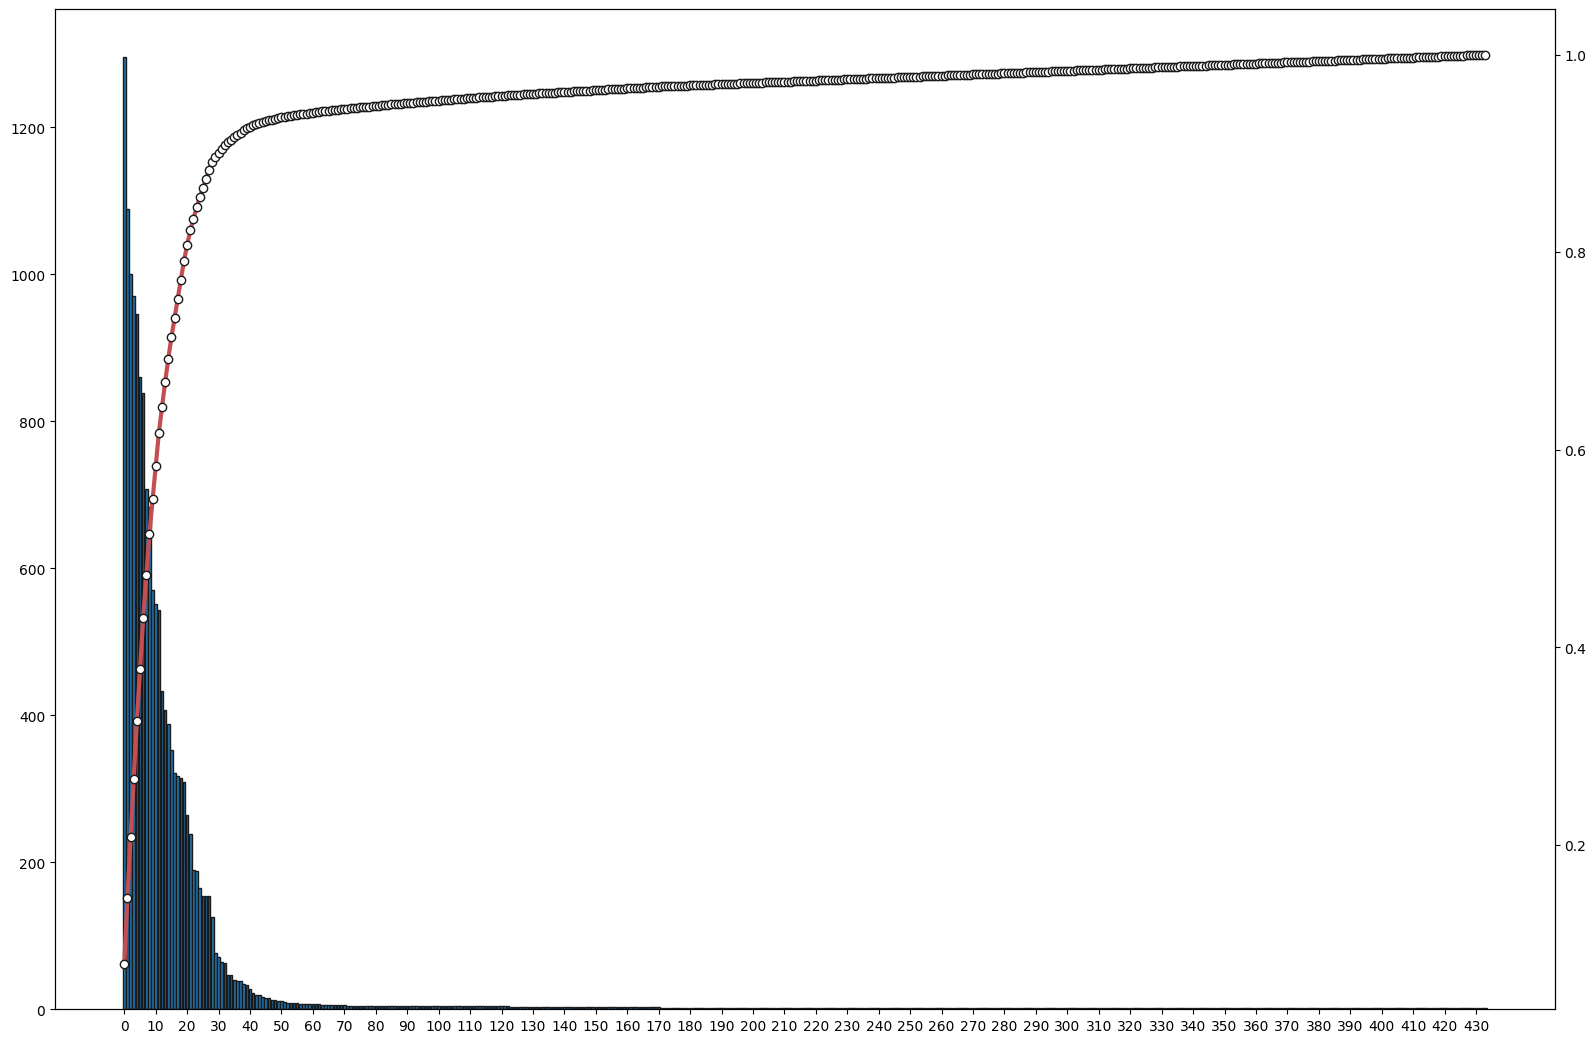

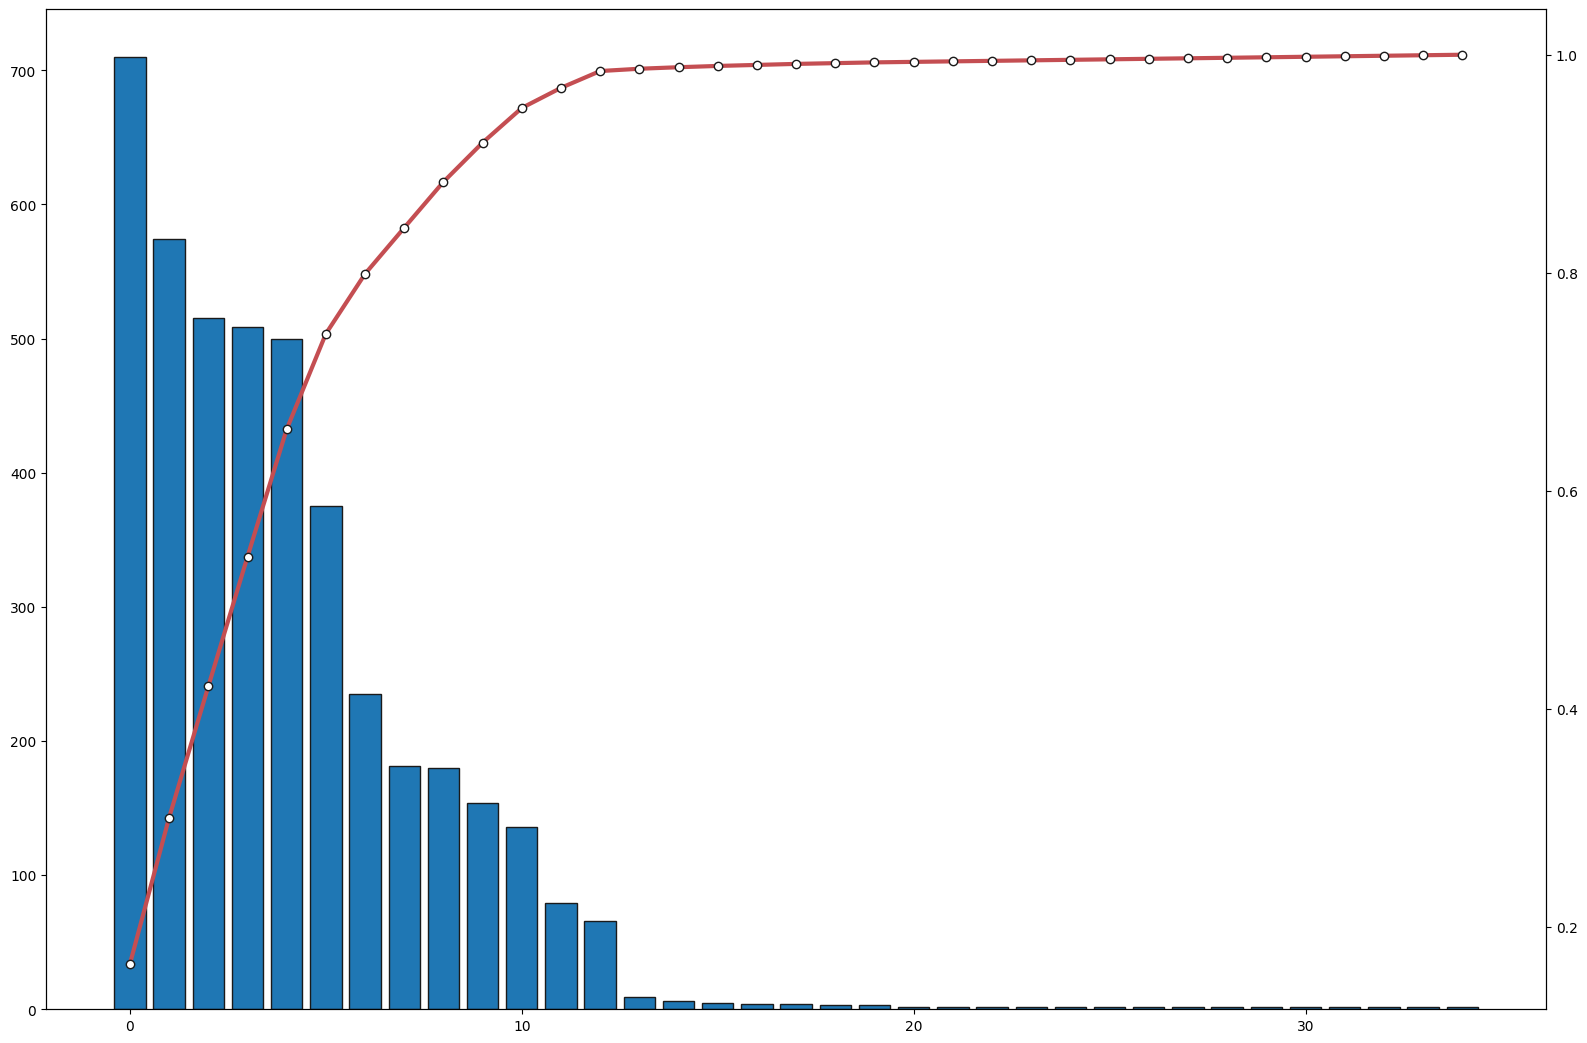

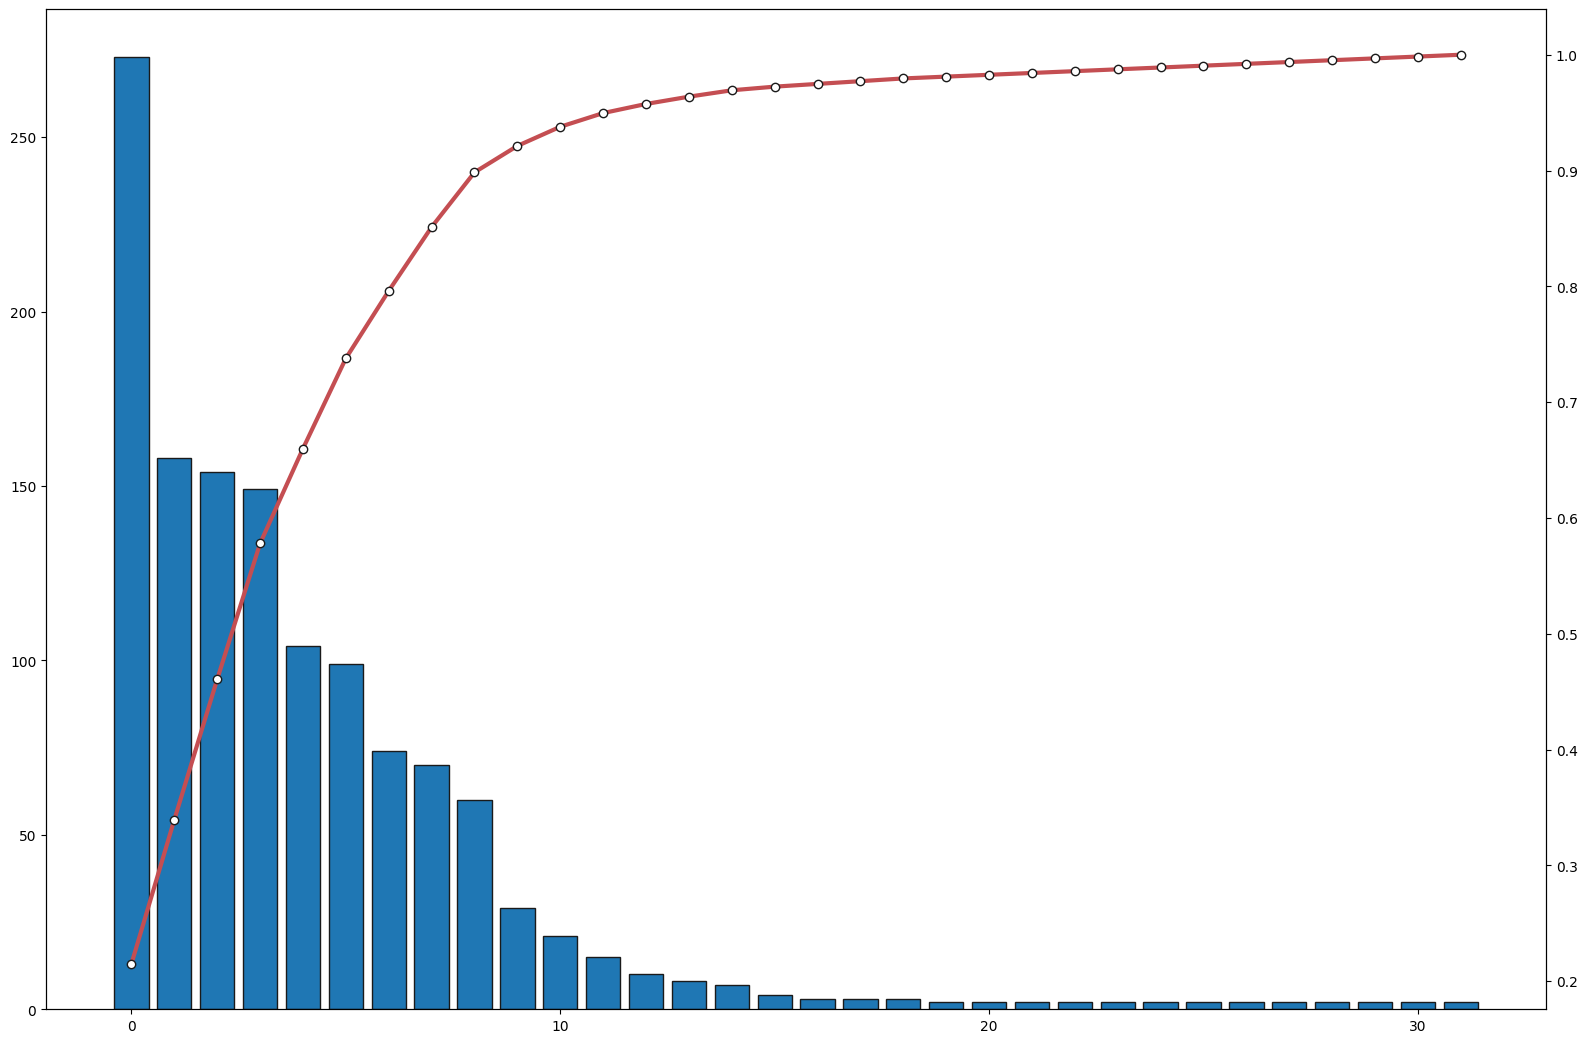

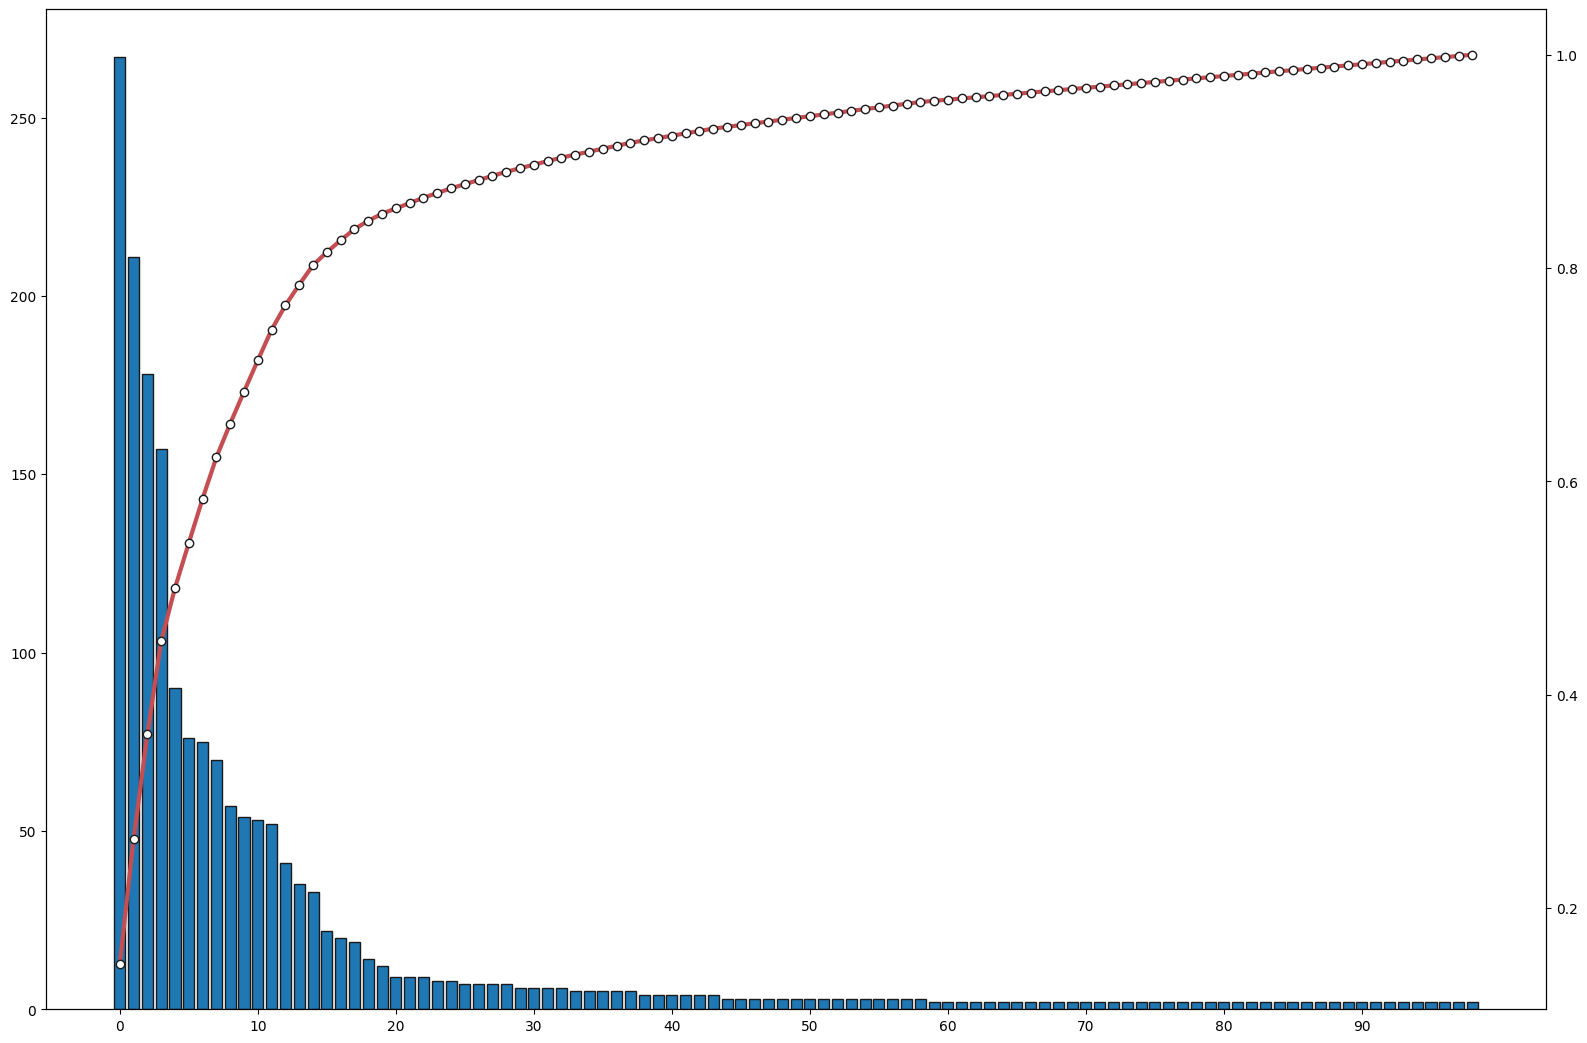

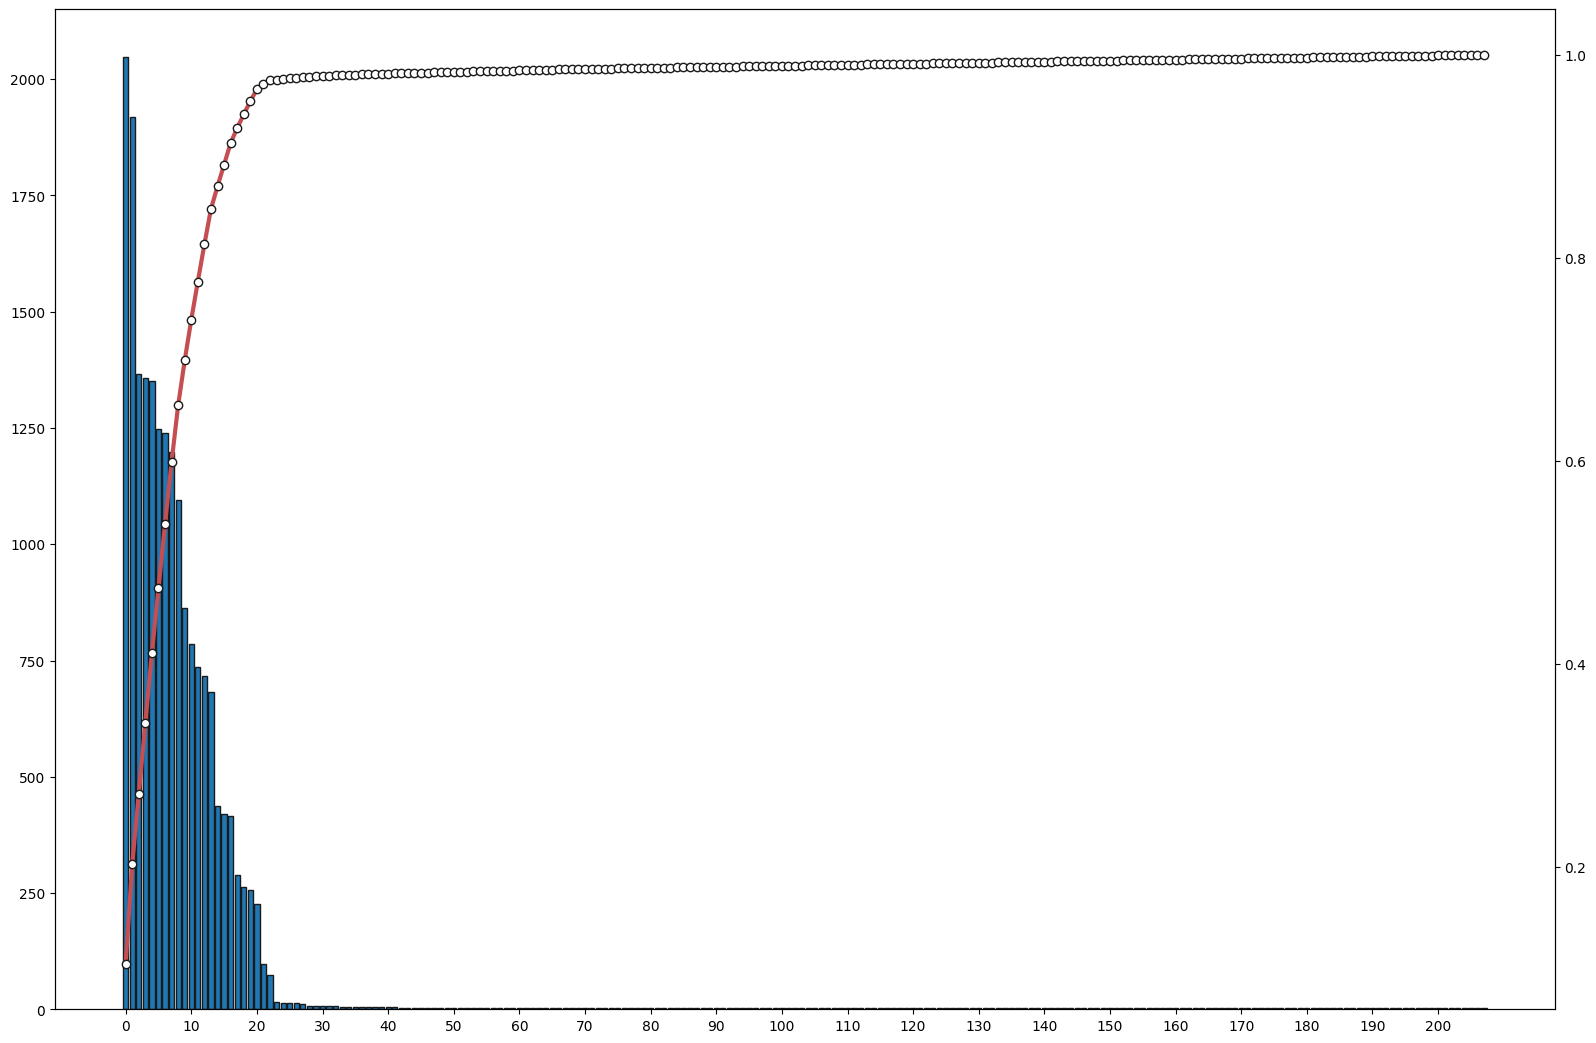

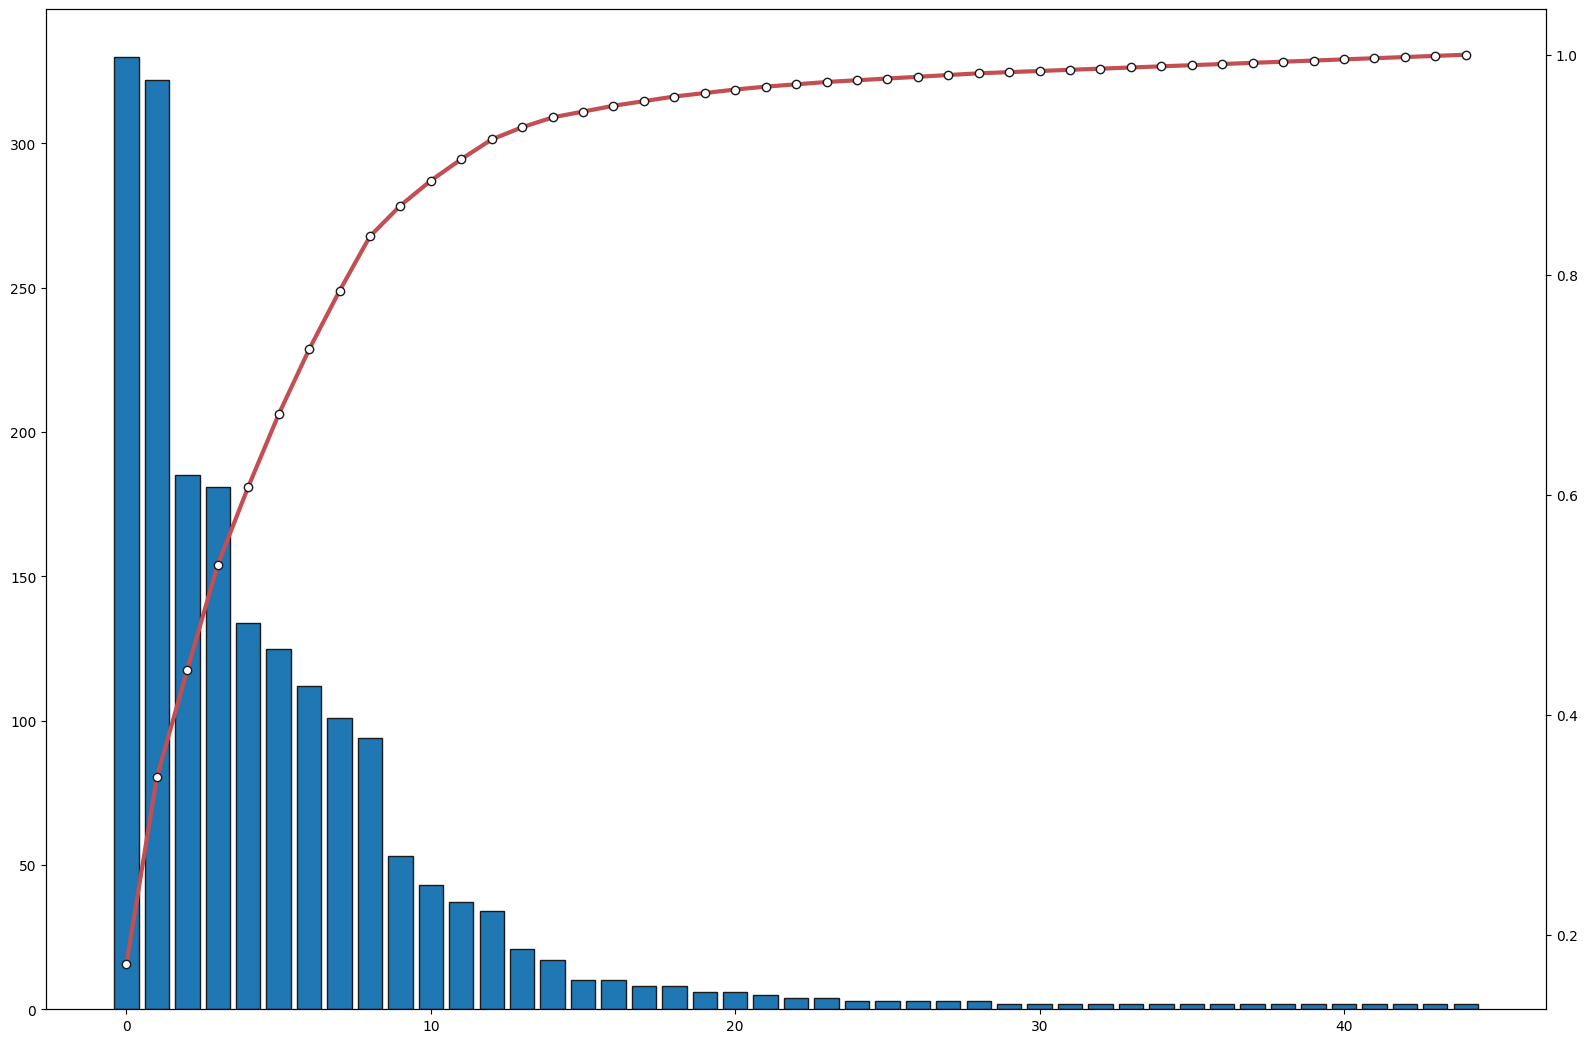

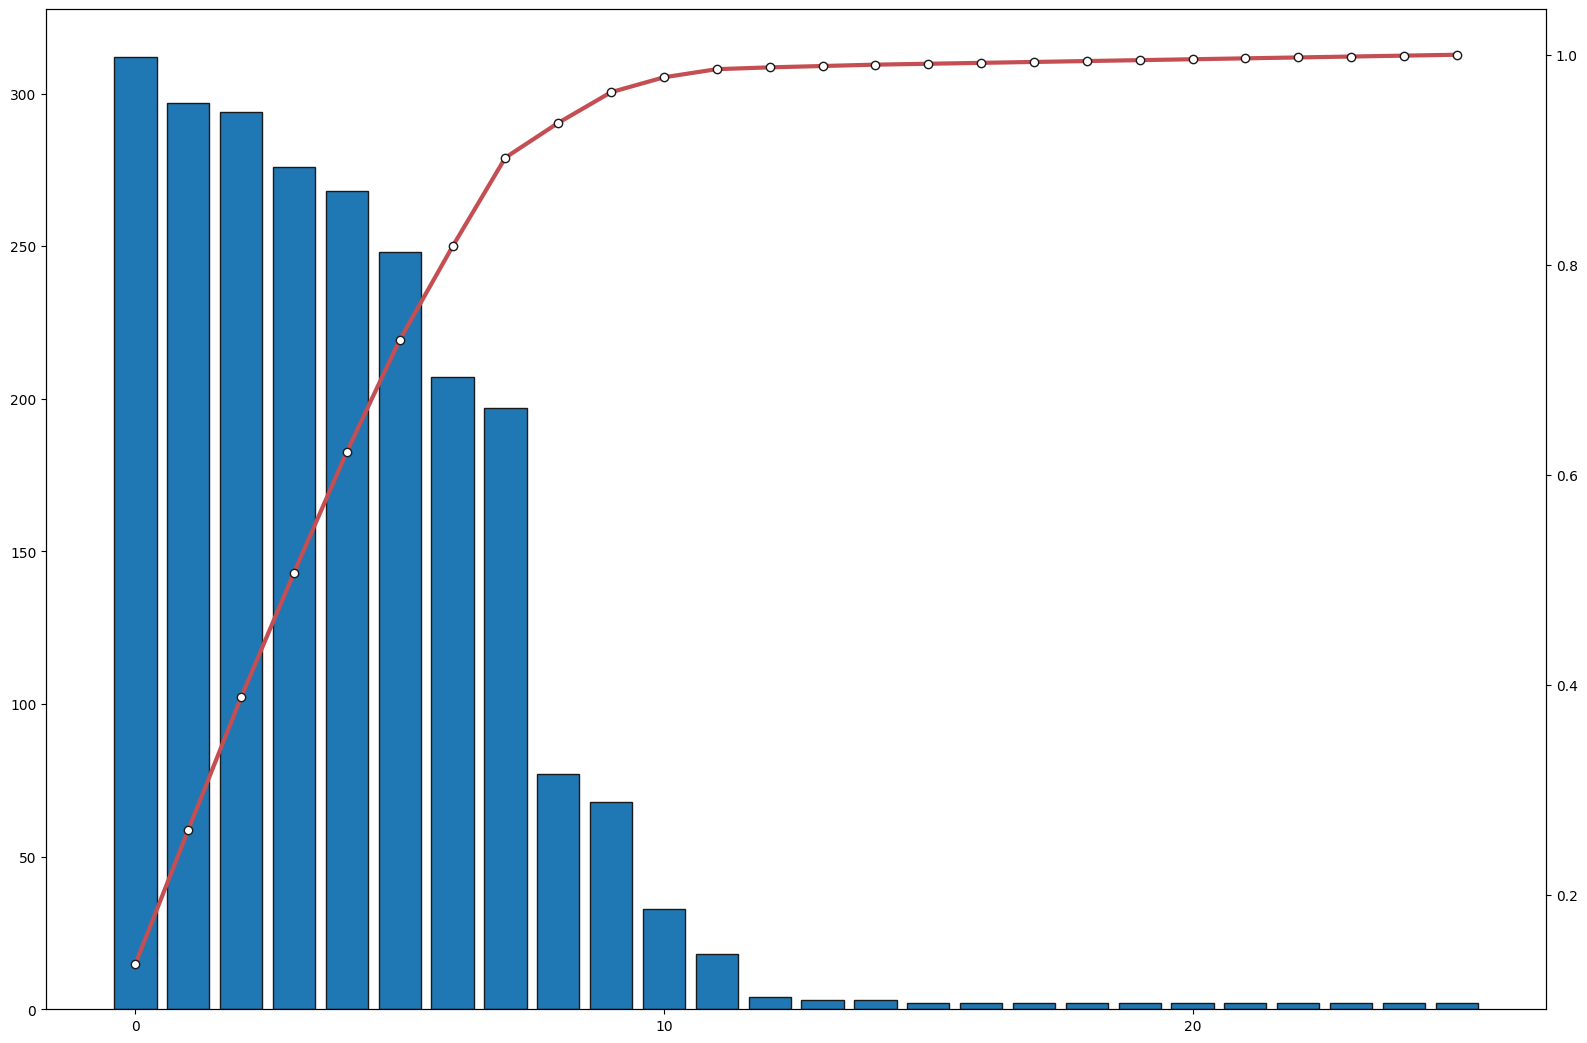

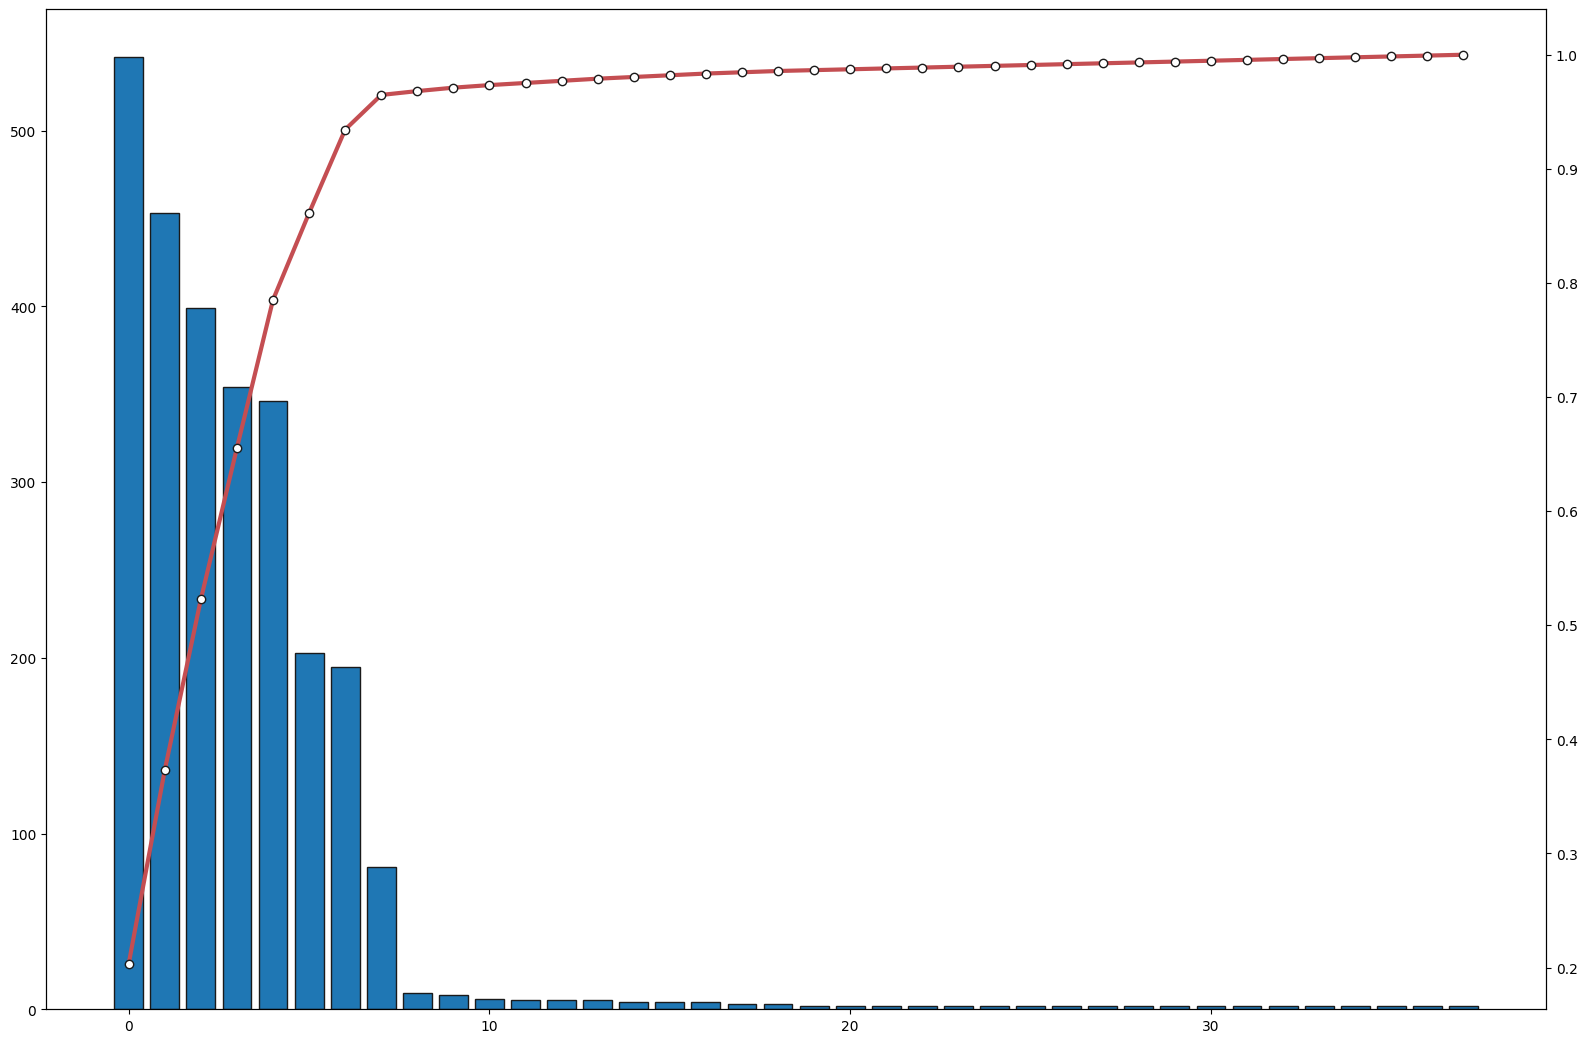

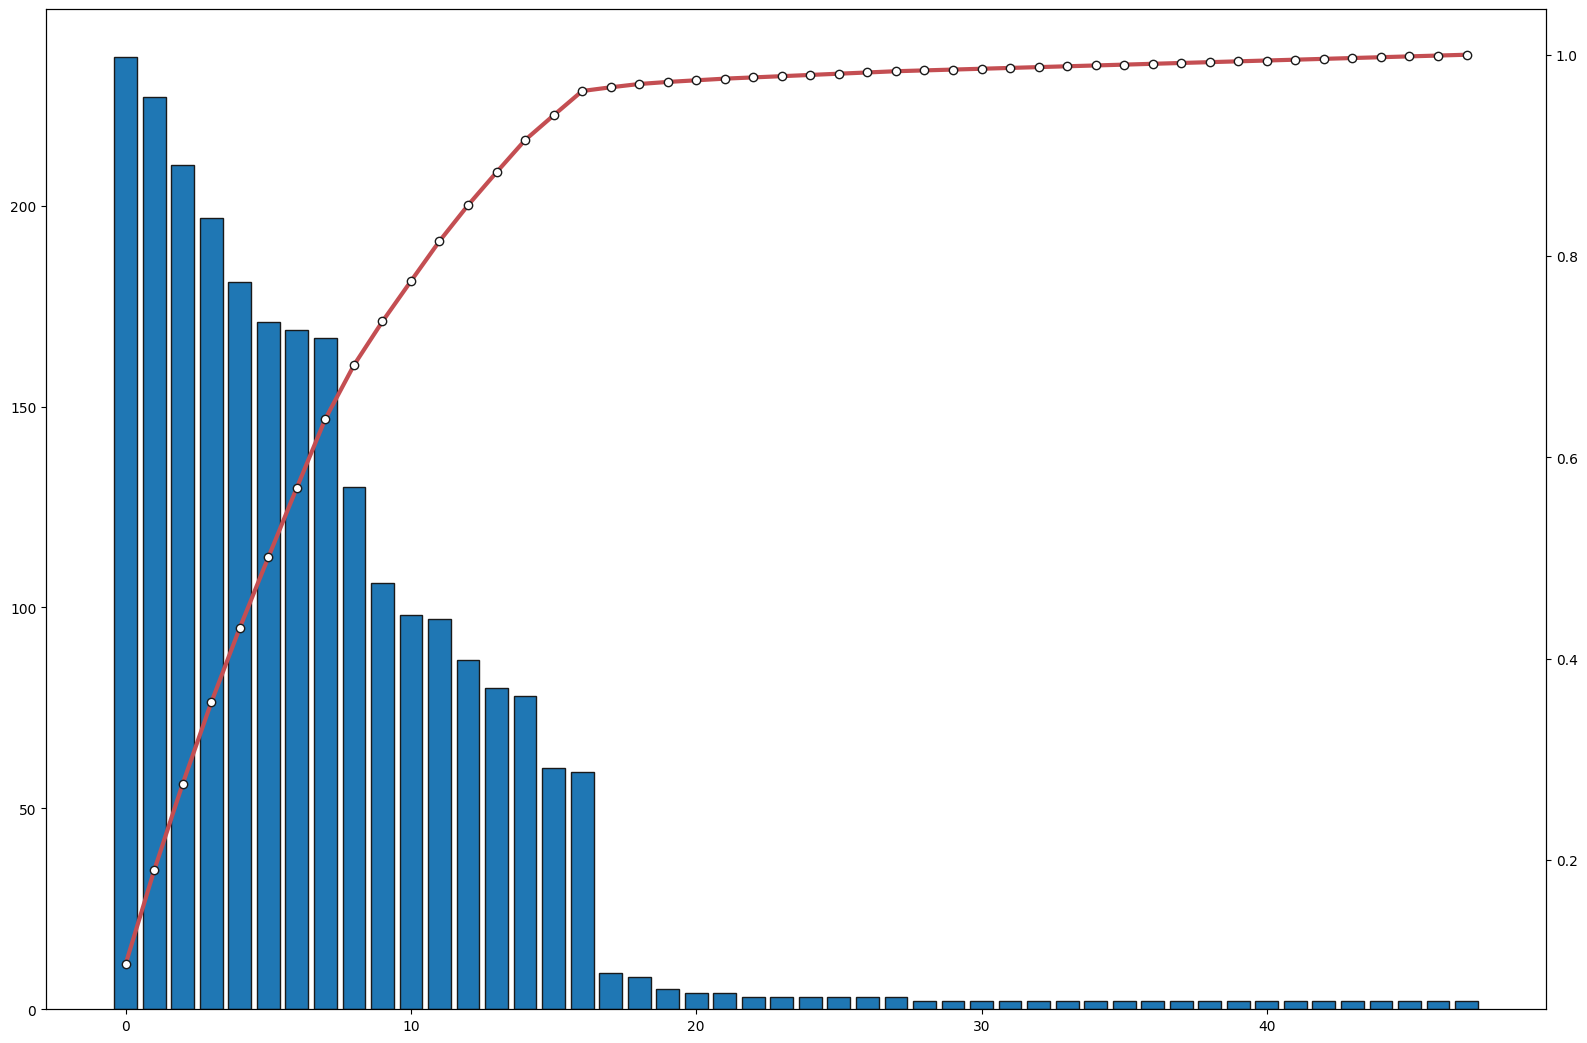

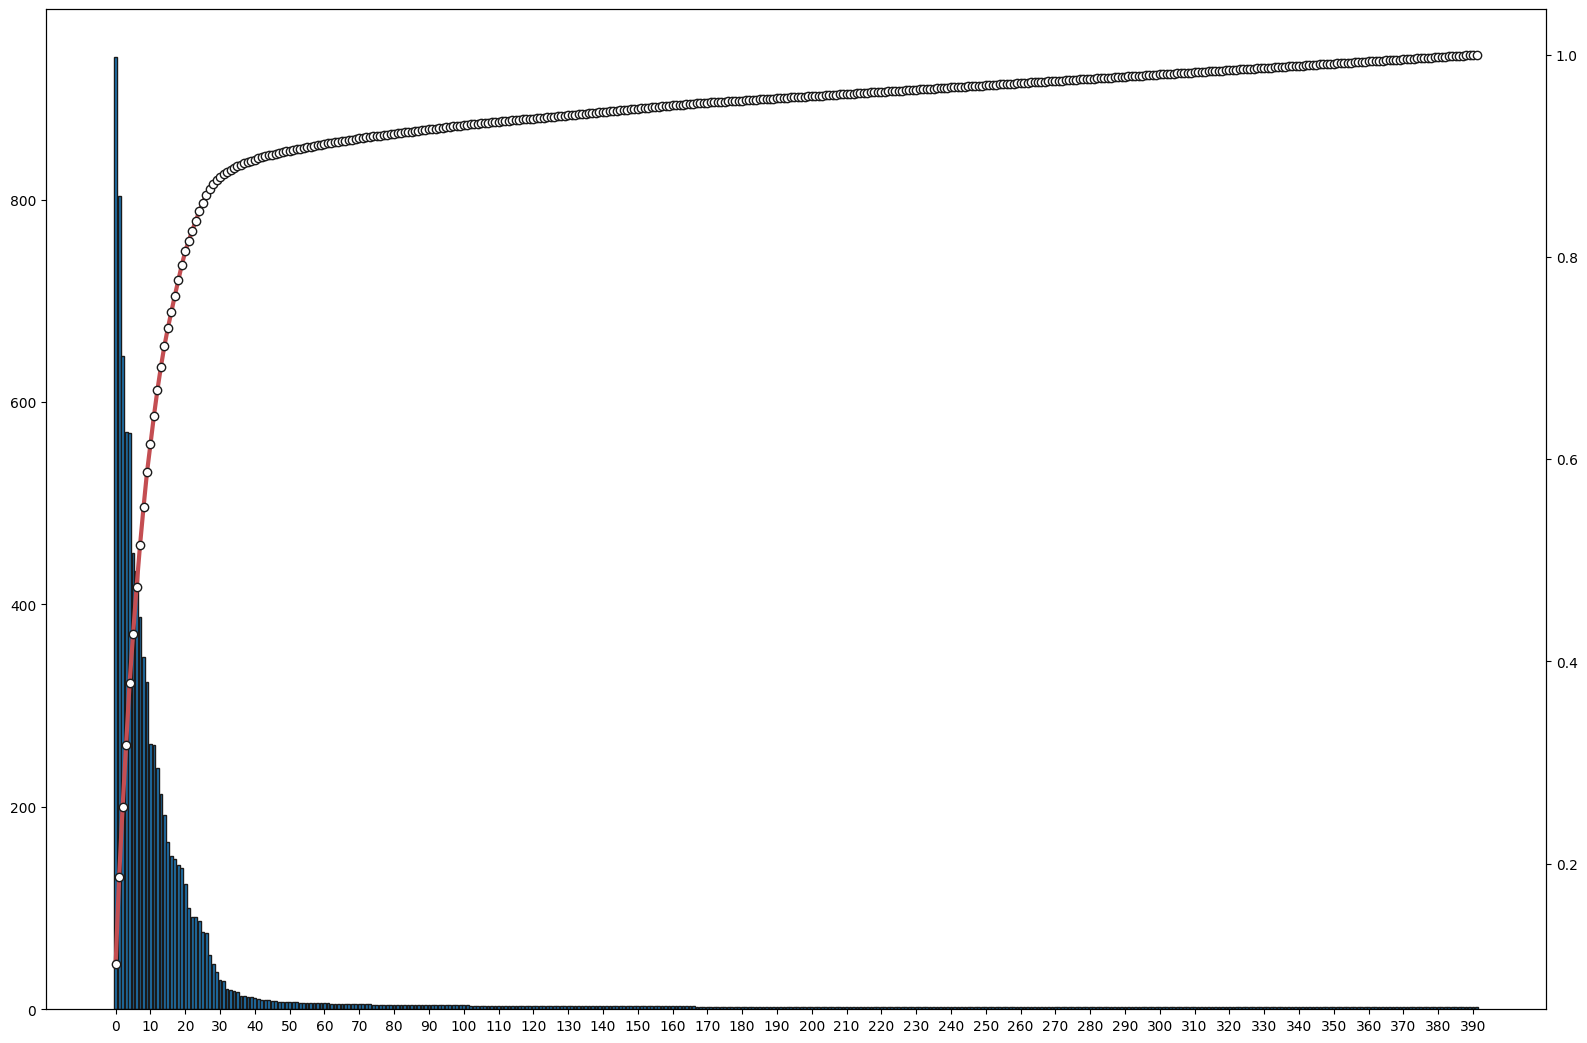

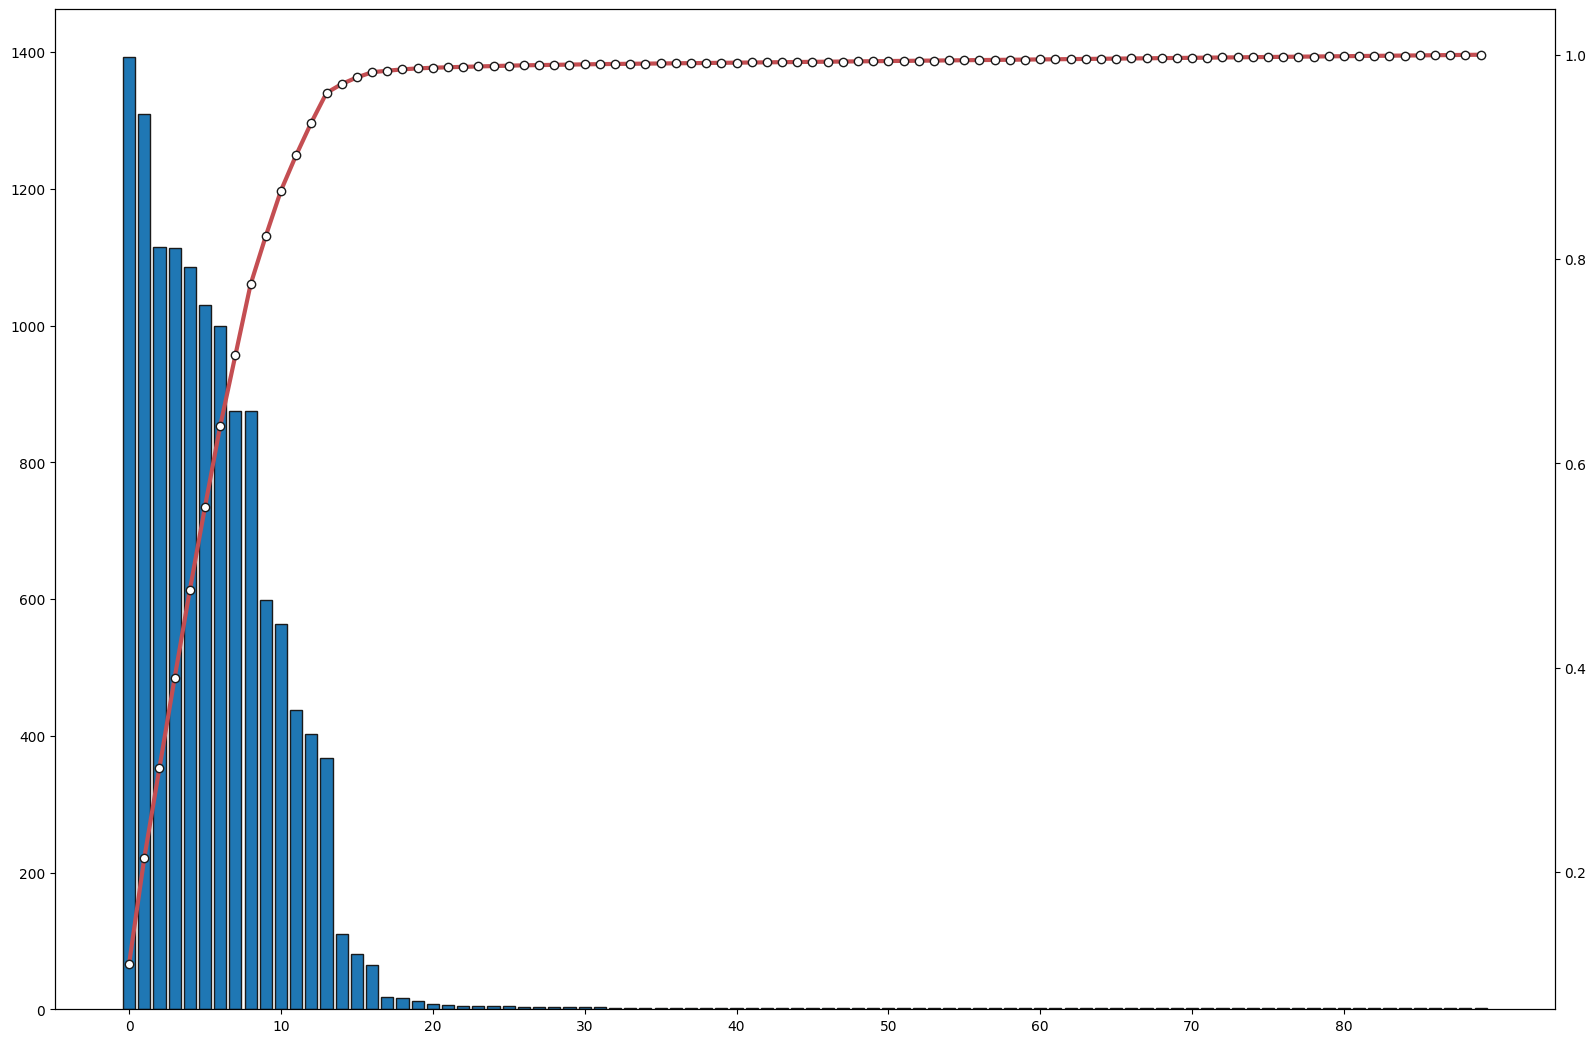

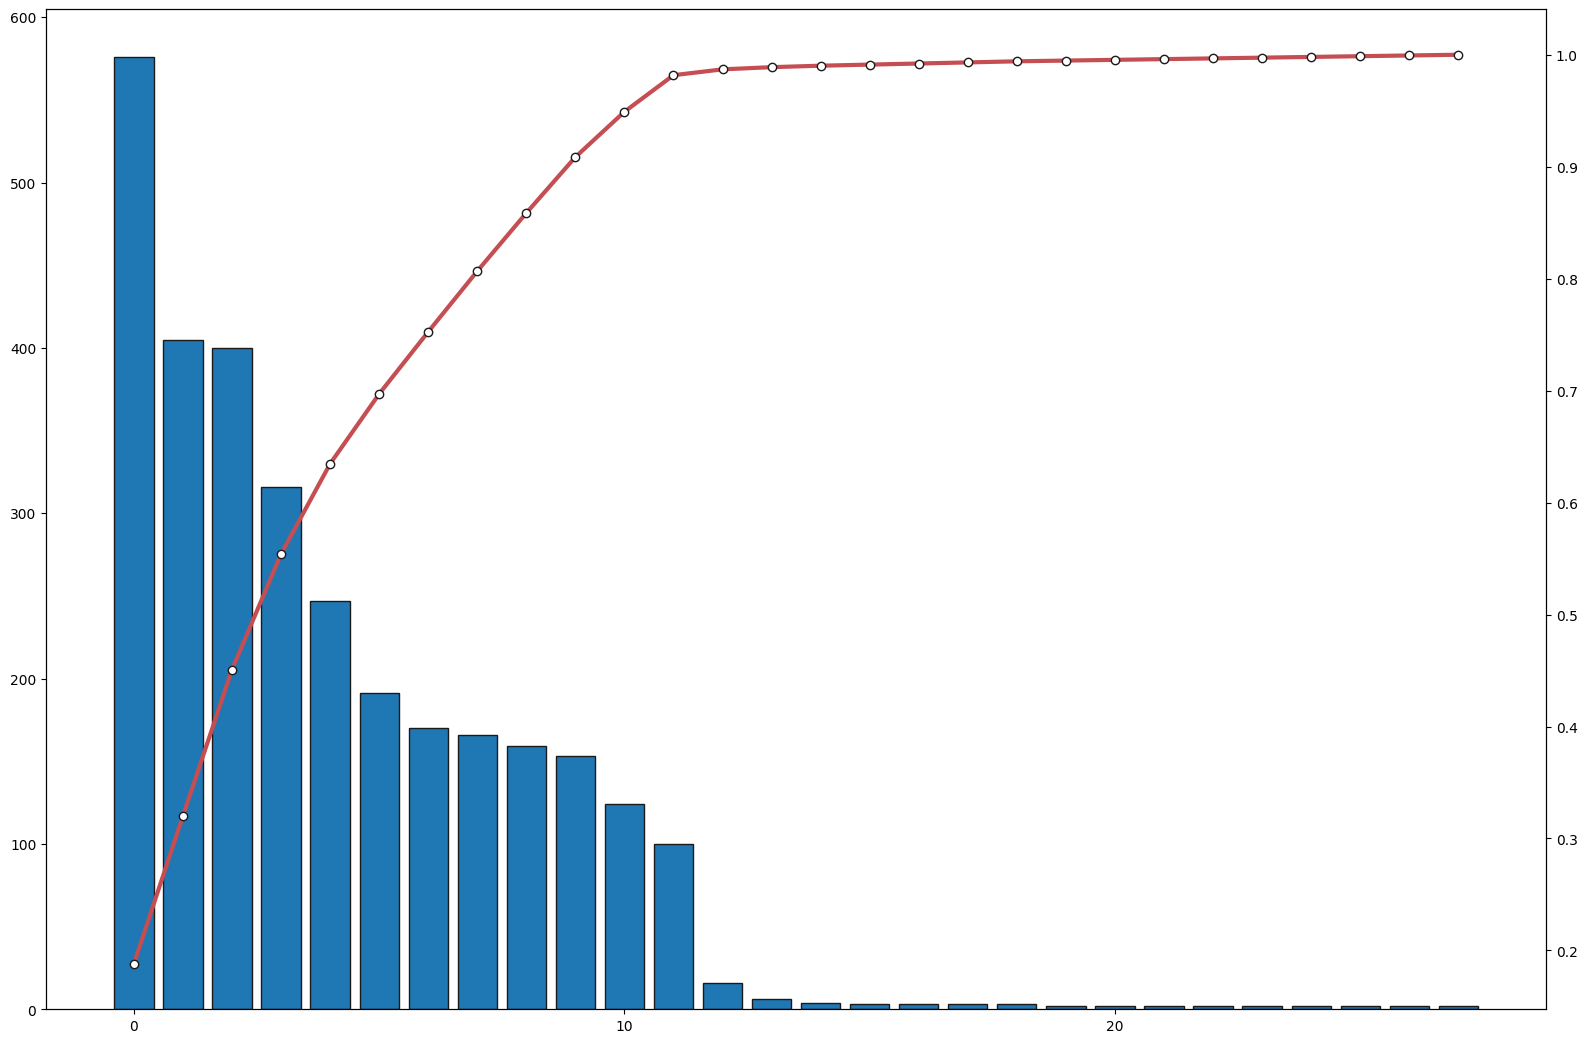

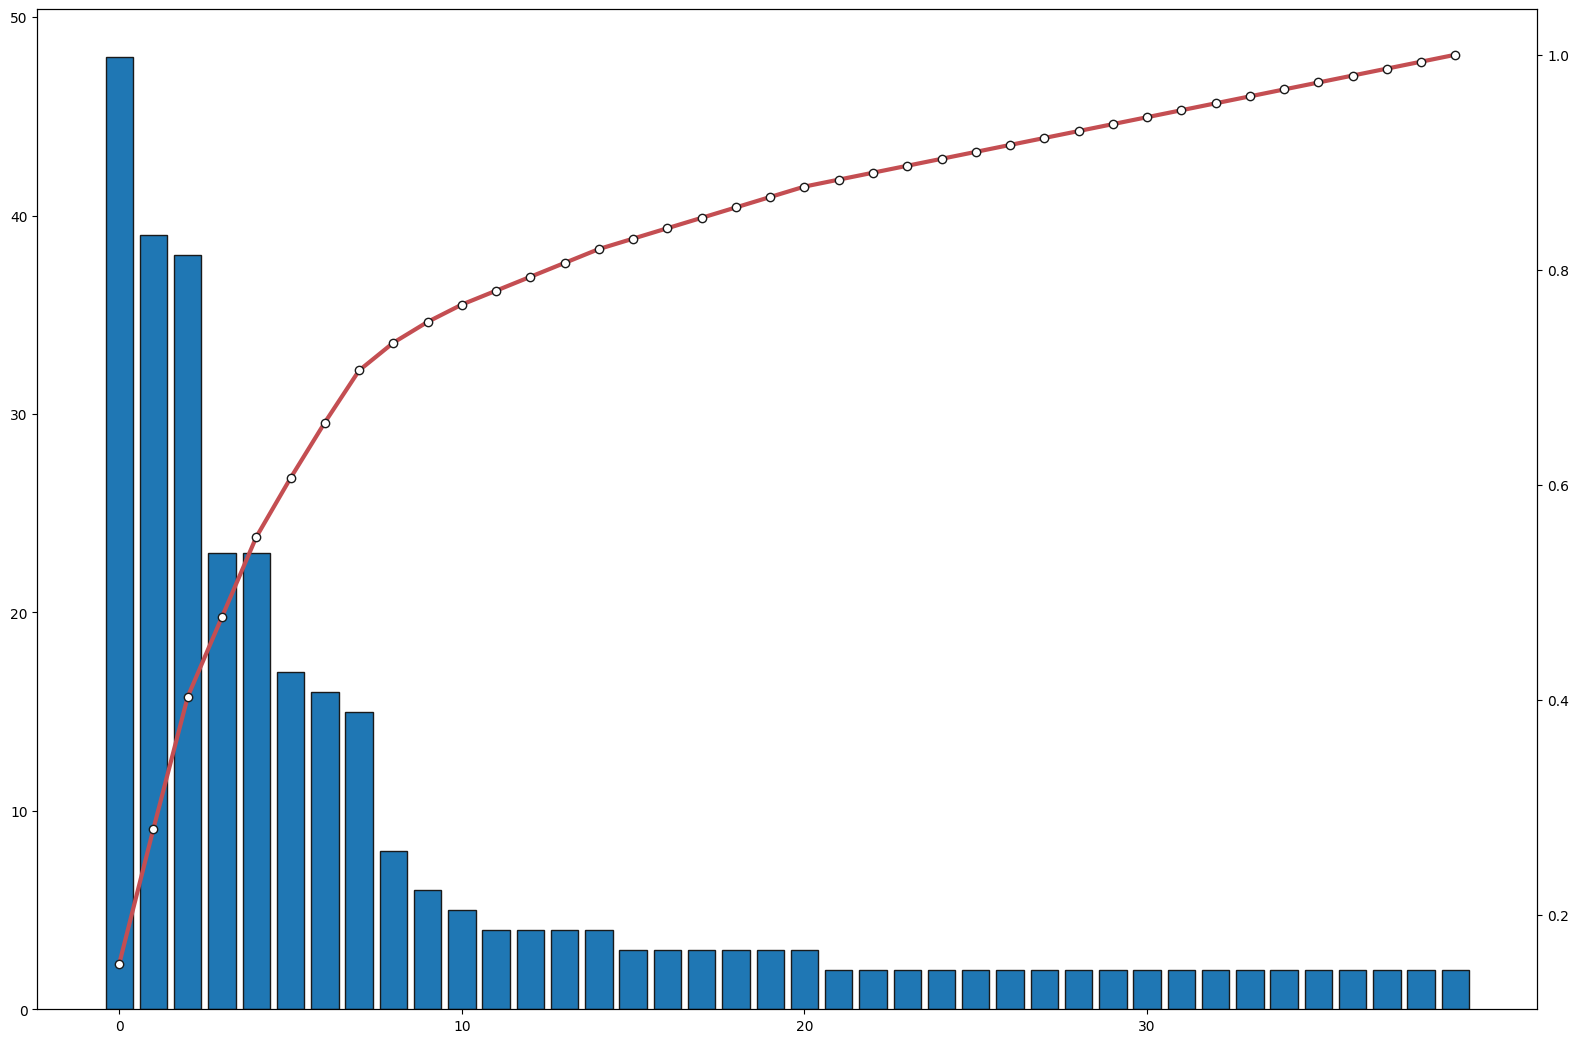

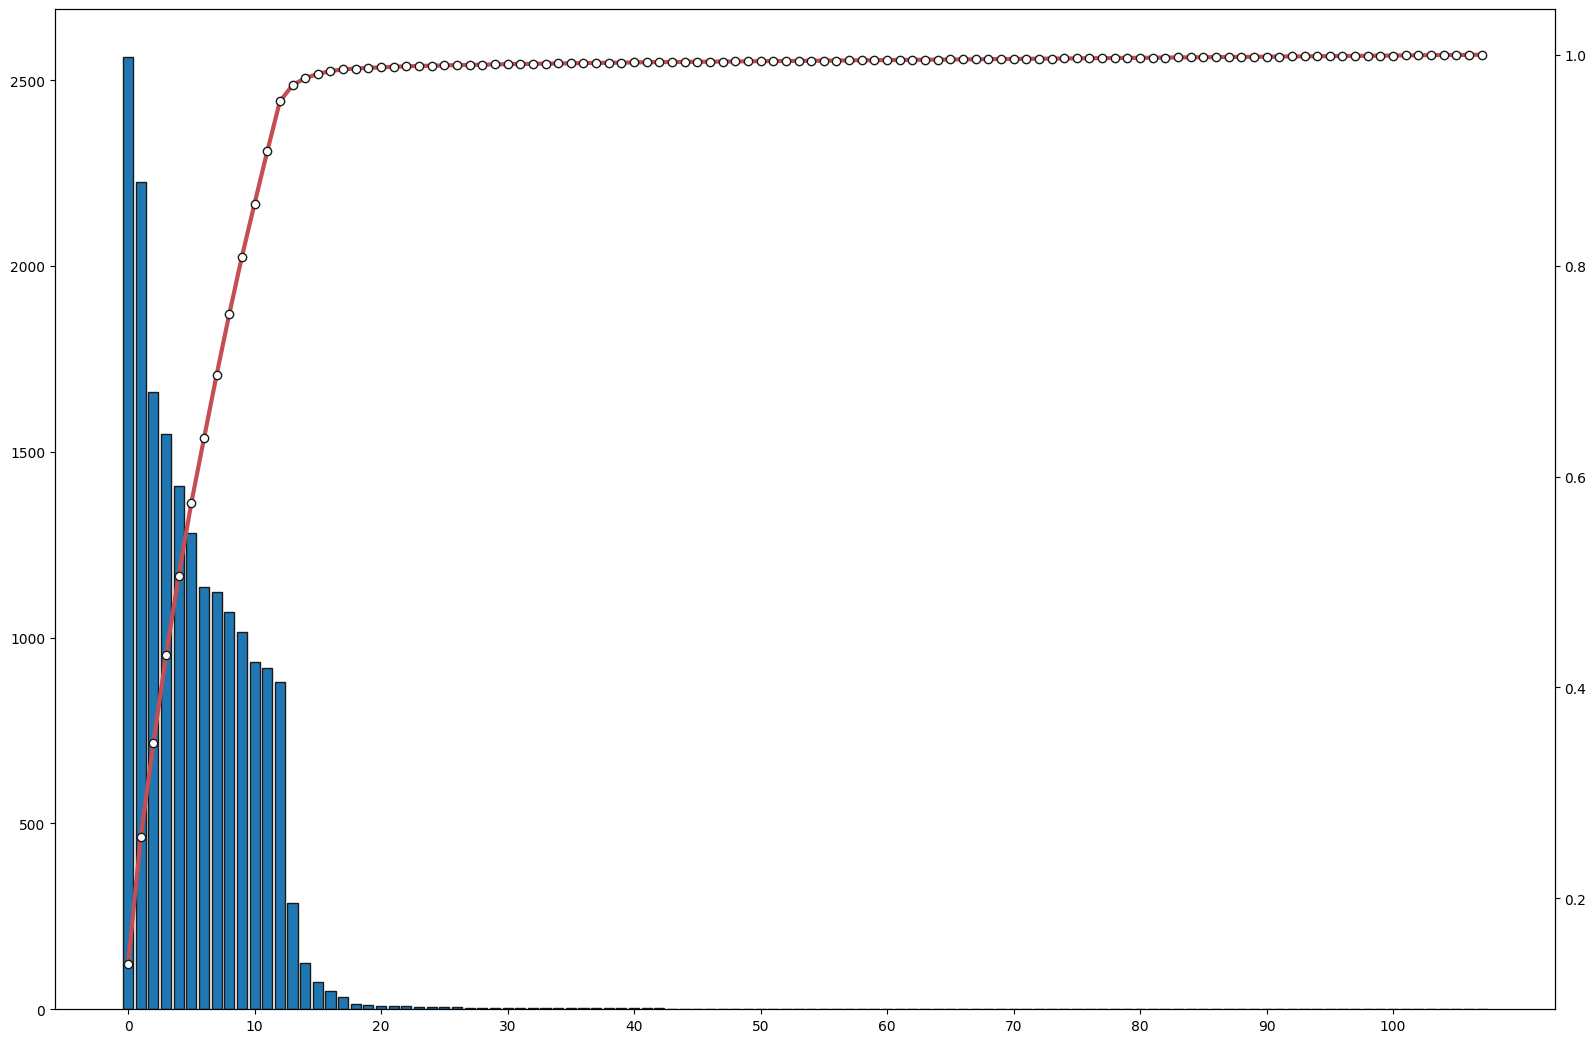

In [17]:
sns.reset_defaults()

for field_name, comms in community_lengths.items():

    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_axes([0, 0, 1, 1])

    comm_id = range(len(comms))
    sorted_comms = sorted(comms, reverse=True)
    cum_comms = list(accumulate(sorted_comms, operator.add))

    dist = np.array(cum_comms) / sum(sorted_comms)

    ax.bar(comm_id, sorted_comms, edgecolor='k')

    ax2 = ax.twinx()

    ax2.plot(
        comm_id,
        dist,
        'ro-', 
        markeredgewidth=1, 
        markeredgecolor='k',
        markerfacecolor="white", 
        linewidth=3,
    )

    plt.xticks(range(0, len(comms), 10))

    plt.savefig(
        os.path.join(LATEX_FIGURES_PATH, 'co_occurrence_louvain_comm_dist', f'{field_name.capitalize()}.png'), 
        transparent=True, 
        dpi=150,
        bbox_inches='tight'
    )